In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import imdb

In [2]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=1000)

In [3]:
from keras.utils import pad_sequences
max_words=500
X_train=pad_sequences(X_train,maxlen=max_words)
X_test=pad_sequences(X_test,maxlen=max_words)

In [4]:
embedding_size=64
model=Sequential()
model.add(Embedding(1000,embedding_size,input_length=max_words))
model.add(SimpleRNN(100,return_sequences=True))
model.add(SimpleRNN(50,return_sequences=True))
model.add(SimpleRNN(25))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 100)          16500     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 500, 50)           7550      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 25)                1900      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 89,976
Trainable params: 89,976
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
Vanilla_RNN=model.fit(X_train,y_train,epochs=10,batch_size=258,validation_split=0.2)

Epoch 1/10
78/78 [==============================] - 65s 814ms/step - loss: 0.7050 - acc: 0.5182 - val_loss: 0.7000 - val_acc: 0.4910
Epoch 2/10
 6/78 [=>............................] - ETA: 2:26 - loss: 0.6788 - acc: 0.5510

KeyboardInterrupt: 

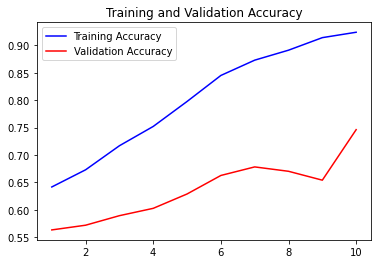

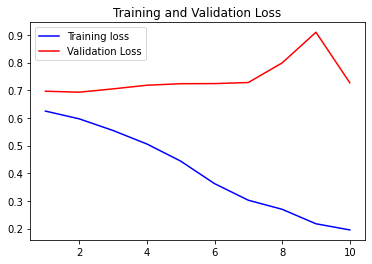

In [11]:
from matplotlib.pylab import plt
acc=Vanilla_RNN.history['acc']
val_acc=Vanilla_RNN.history['val_acc']
loss=Vanilla_RNN.history['loss']
val_loss=Vanilla_RNN.history['val_loss']
epochs=range(1,11)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### LSTM

In [12]:
model=Sequential()
model.add(Embedding(1000,embedding_size,input_length=(max_words)))
model.add(LSTM(100,return_sequences='ture'))
model.add(LSTM(50,return_sequences='ture'))
model.add(LSTM(25))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm (LSTM)                 (None, 500, 100)          53200     
                                                                 
 lstm_1 (LSTM)               (None, 500, 50)           30200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,026
Trainable params: 123,026
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
lstm=model.fit(X_train,y_train,epochs=1,batch_size=256,validation_split=0.2)

79/79 [==============================] - 538s 7s/step - loss: 0.5375 - acc: 0.7407 - val_loss: 0.4836 - val_acc: 0.7820


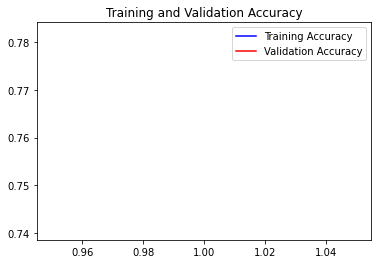

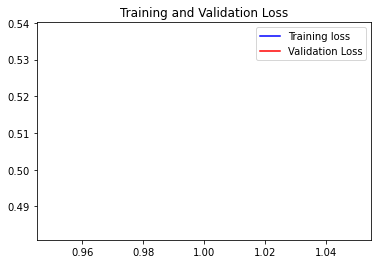

In [18]:
from matplotlib.pylab import plt
acc=lstm.history['acc']
val_acc=lstm.history['val_acc']
loss=lstm.history['loss']
val_loss=lstm.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### GRU

In [20]:
model=Sequential()
model.add(Embedding(1000,embedding_size,input_length=(max_words)))
model.add(GRU(100,return_sequences='true'))
model.add(GRU(50,return_sequences='true'))
model.add(GRU(25))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           32000     
                                                                 
 gru (GRU)                   (None, 500, 100)          40200     
                                                                 
 gru_1 (GRU)                 (None, 500, 50)           22800     
                                                                 
 gru_2 (GRU)                 (None, 25)                5775      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 100,801
Trainable params: 100,801
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gru=model.fit(X_train,y_train,epochs=1,batch_size=256,validation_split=0.2)

79/79 [==============================] - 561s 7s/step - loss: 0.6828 - acc: 0.5524 - val_loss: 0.6267 - val_acc: 0.6390


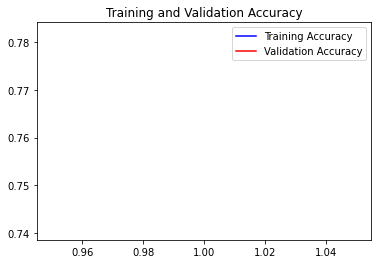

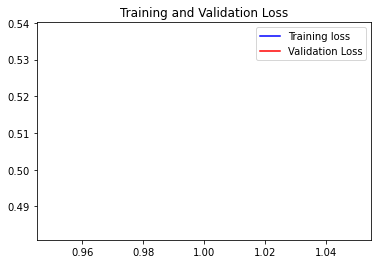

In [23]:
from matplotlib.pylab import plt
acc=lstm.history['acc']
val_acc=lstm.history['val_acc']
loss=lstm.history['loss']
val_loss=lstm.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()